In [19]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import folium
import os
import sys
import abstract_flows.arrow as arrow
import abstract_flows.grid as grid
import abstract_flows.flows as flows
from load_data import load_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
%%script false --no-raise-error
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
%config InLineBackend.figure_format = 'retina'
%config InLineBackend.savefig_format = 'pdf'
print('Retina screen activated')

In [85]:
data = np.load('synthetic_data/flows.npy')
data.shape

(100, 10, 10)

In [4]:
labels = np.load('synthetic_data/labels.npy')

In [86]:
for i, l in enumerate(labels):
    print(i, l)

0 0
1 3
2 0
3 0
4 3
5 1
6 0
7 2
8 2
9 1
10 2
11 3
12 1
13 1
14 2
15 0
16 3
17 0
18 2
19 2
20 3
21 0
22 2
23 0
24 2
25 2
26 1
27 3
28 3
29 0
30 3
31 1
32 1
33 2
34 1
35 3
36 0
37 3
38 0
39 1
40 2
41 0
42 1
43 3
44 2
45 2
46 3
47 1
48 2
49 1
50 2
51 3
52 3
53 0
54 0
55 1
56 2
57 3
58 0
59 1
60 0
61 3
62 1
63 2
64 2
65 0
66 3
67 1
68 2
69 1
70 0
71 3
72 2
73 0
74 3
75 1
76 1
77 3
78 1
79 2
80 2
81 0
82 1
83 1
84 3
85 1
86 3
87 2
88 2
89 2
90 0
91 0
92 3
93 0
94 1
95 3
96 3
97 0
98 1
99 0


In [87]:
flow1 = data[0]
flow2 = data[2]

In [91]:
flow1

array([[0.02479339, 0.        , 0.        , 0.        , 0.        ,
        0.00413223, 0.02892562, 0.00826446, 0.00413223, 0.        ],
       [0.00413223, 0.02892562, 0.00413223, 0.02892562, 0.00413223,
        0.00413223, 0.00826446, 0.00826446, 0.00413223, 0.00413223],
       [0.00413223, 0.04132231, 0.02892562, 0.02479339, 0.        ,
        0.00413223, 0.03719008, 0.00413223, 0.        , 0.00826446],
       [0.00826446, 0.00413223, 0.02479339, 0.        , 0.02479339,
        0.        , 0.        , 0.00826446, 0.00413223, 0.        ],
       [0.00826446, 0.        , 0.02892562, 0.02479339, 0.02479339,
        0.        , 0.00826446, 0.00413223, 0.00826446, 0.00826446],
       [0.02479339, 0.        , 0.        , 0.00826446, 0.00413223,
        0.02479339, 0.        , 0.        , 0.00826446, 0.        ],
       [0.00413223, 0.00826446, 0.04545455, 0.00413223, 0.        ,
        0.        , 0.00413223, 0.        , 0.        , 0.04958678],
       [0.        , 0.        , 0.0041322

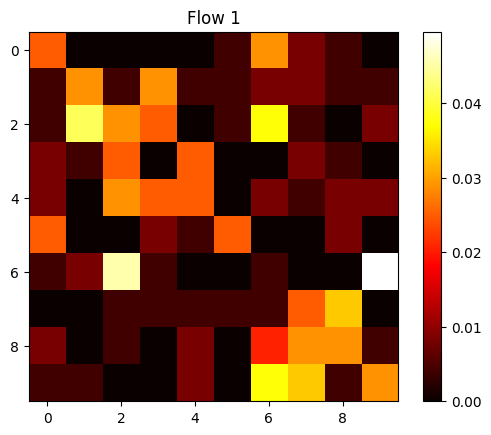

In [88]:
plt.imshow(flow1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Flow 1')
plt.show()

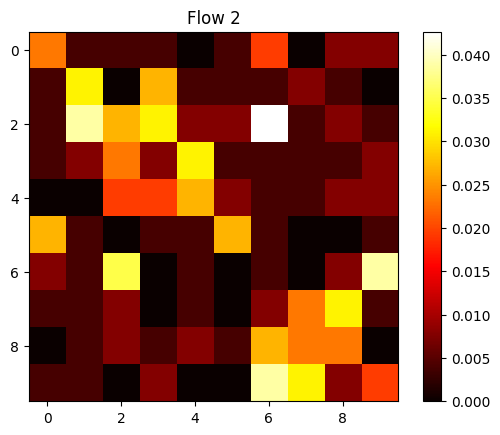

In [90]:
plt.imshow(flow2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Flow 2')
plt.show()

**Prueba 1**

- **Número de átomos:** 4  
- **Épocas:** 50  
- **Regularización:** L2  
- **Lambda:** 0.1  
- **Suavizado:** False  
- **Gamma:** 0.1  
- **Pasos de alpha:** 50  
- **Pasos de diccionario:** 50  
- **Tasa de aprendizaje:** 0.001  
- **Tamaño de batch:** 20  
- **Pérdida final:** 31903.89

In [7]:
alpha1 = np.load('results_experiment_1/weights.npy')
alpha1.shape

(100, 4, 10)

In [69]:
def visualizar_pca_vectores(alpha1, labels):
# Determinar etiquetas únicas (máximo 4 para visualización)
    etiquetas_unicas = np.unique(labels)
    if len(etiquetas_unicas) > 4:
        print("Advertencia: hay más de 4 etiquetas; se mostrarán solo las primeras 4.")
        etiquetas_unicas = etiquetas_unicas[:4]

    # Elegir una matriz aleatoria por etiqueta
    selected_indices = []
    for label in etiquetas_unicas:
        idx = np.where(labels == label)[0]
        if len(idx) > 0:
            index = np.random.randint(0, len(idx))
            selected_indices.append(idx[index])

    selected_matrices = alpha1[selected_indices]  # (k, 4, 10)
    selected_labels = labels[selected_indices]
    k = len(selected_matrices)

    # Reorganizar a vectores columna
    vector_sets = [matrix.T for matrix in selected_matrices]
    all_vectors = np.vstack(vector_sets)  # (k*10, 4)

    # PCA
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(all_vectors)
    print('Variabilidad explicada por PCA:', pca.explained_variance_ratio_.sum())

    # Colores
    colores_base = ['red', 'green', 'blue', 'orange']
    label_to_color = {label: colores_base[i] for i, label in enumerate(etiquetas_unicas)}

    # Graficar
    plt.figure(figsize=(8, 6))
    start = 0
    for i, label in enumerate(selected_labels):
        puntos = reduced[start:start+10]
        plt.scatter(puntos[:, 0], puntos[:, 1], label=f'Etiqueta {label}', color=label_to_color[label], alpha=0.5, s=100)

        # Añadir los números del 1 al 10
        for j in range(10):
            plt.text(puntos[j, 0], puntos[j, 1], str(j+1), fontsize=9, ha='center', va='center')

        start += 10

    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Proyección PCA de vectores (coloreados por etiqueta)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Variabilidad explicada por PCA: 0.61968863


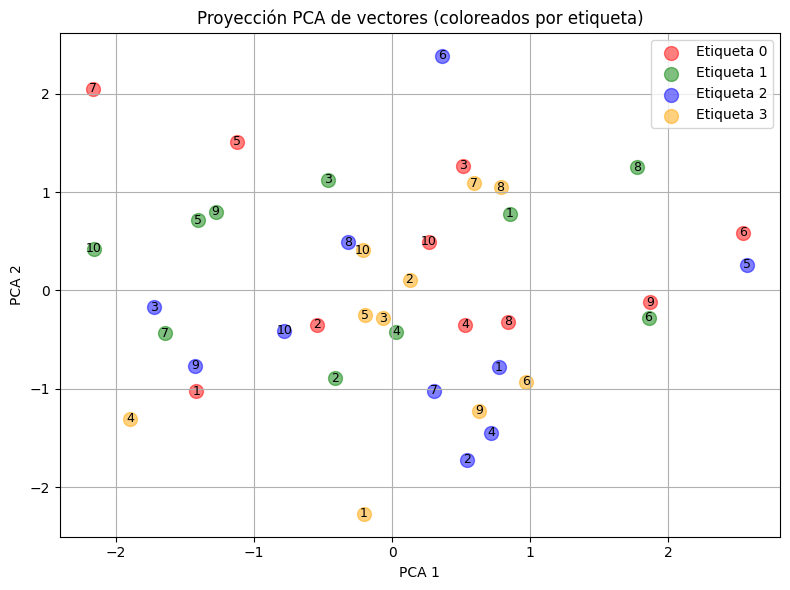

In [70]:
visualizar_pca_vectores(alpha1, labels)

In [95]:
def visualizar_dos_matrices_misma_etiqueta(alpha1, labels, etiqueta_objetivo):
    idx = np.where(labels == etiqueta_objetivo)[0]
    if len(idx) < 2:
        raise ValueError("Se requieren al menos dos matrices con la etiqueta proporcionada.")

    # Seleccionar aleatoriamente dos matrices distintas
    selected_indices = np.random.choice(idx, size=2, replace=False)

    # Extraer matrices y transponer para obtener vectores columna
    selected_matrices = alpha1[selected_indices]  # shape (2, 4, 10)
    vector_sets = [matrix.T for matrix in selected_matrices]  # lista de (10, 4)

    # Unir vectores y aplicar PCA
    all_vectors = np.vstack(vector_sets)  # shape (20, 4)
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(all_vectors)
    print('Variabilidad explicada por PCA:', pca.explained_variance_ratio_.sum())

    # Colores distintos para cada matriz
    colores = ['red', 'blue']

    # Graficar
    plt.figure(figsize=(8, 6))
    start = 0
    for i in range(2):
        puntos = reduced[start:start+10]
        plt.scatter(puntos[:, 0], puntos[:, 1], color=colores[i], alpha=0.5, label=f'Matriz {i+1} (etiqueta {etiqueta_objetivo})', s=100)
        for j in range(10):
            plt.text(puntos[j, 0], puntos[j, 1], str(j+1), fontsize=9, ha='center', va='center')
        start += 10

    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'PCA de vectores columna de dos matrices con etiqueta {etiqueta_objetivo}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Variabilidad explicada por PCA: 0.6540868


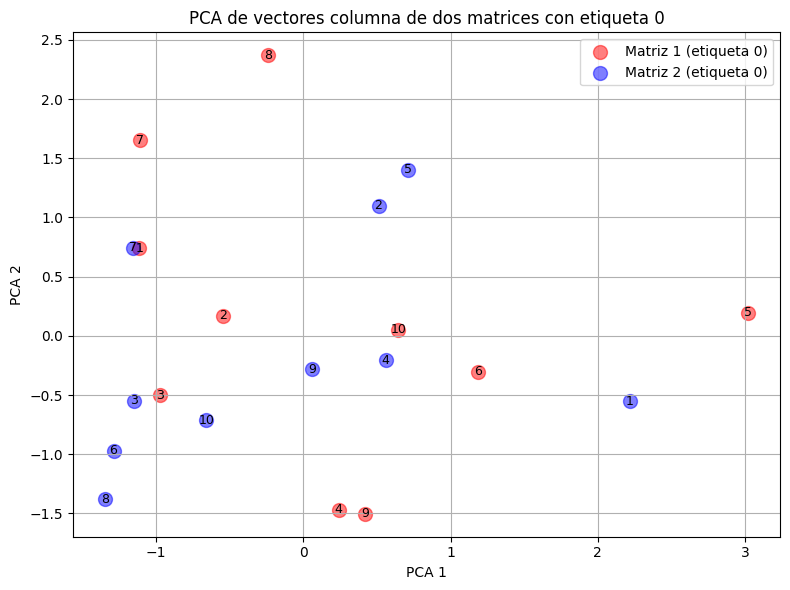

In [110]:
visualizar_dos_matrices_misma_etiqueta(alpha1, labels, etiqueta_objetivo=0)

**Prueba 1-1**

**Número de átomos:** 4  
**Épocas:** 50  
**Regularización:** L2  
**Lambda:** 0.1  
**Suavizado:** True  
**Gamma:** 0.1  
**Pasos de alpha:** 50  
**Pasos de diccionario:** 50  
**Tasa de aprendizaje:** 0.001  
**Tamaño de batch:** 20  
**Pérdida final:** 39992.18  

In [81]:
alpha1_1 = np.load('results_experiment_1_1/weights.npy')
alpha1_1.shape

(100, 4, 10)

Variabilidad explicada por PCA: 0.56578887


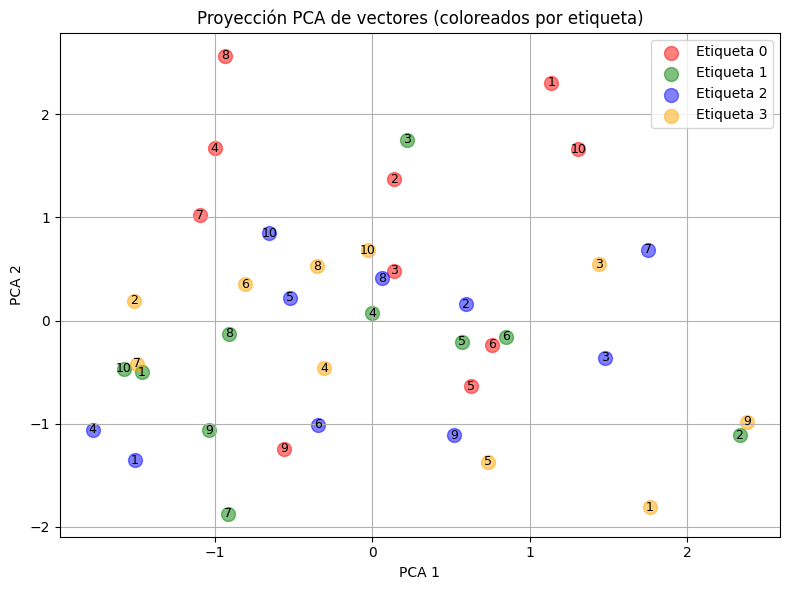

In [82]:
visualizar_pca_vectores(alpha1_1, labels)

Variabilidad explicada por PCA: 0.7160598


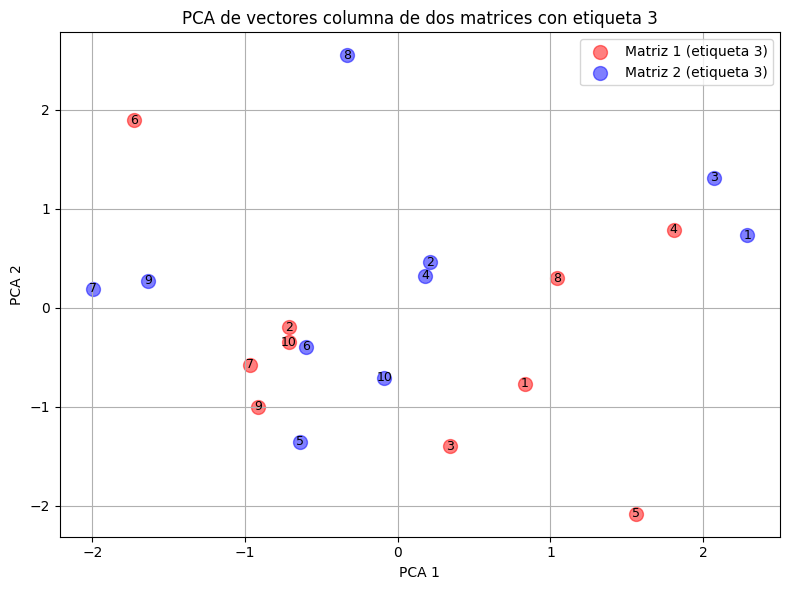

In [84]:
visualizar_dos_matrices_misma_etiqueta(alpha1_1, labels, etiqueta_objetivo=3)

**Prueba 1-2**

- **Número de átomos:** 4  
- **Épocas:** 50  
- **Regularización:** L1  
- **Lambda:** 0.1  
- **Suavizado:** True  
- **Gamma:** 0.1  
- **Pasos de alpha:** 50  
- **Pasos de diccionario:** 50  
- **Tasa de aprendizaje:** 0.001  
- **Tamaño de batch:** 20  
- **Pérdida final:** 31794.40

In [36]:
alpha1_2 = np.load('results_experiment_1_2/weights.npy')
alpha1_2.shape

(100, 4, 10)

In [41]:
alpha1_2[0]

array([[ 1.0966339 ,  0.36015525,  0.22897401,  0.26622975, -0.27929562,
        -0.1826322 , -1.7217062 , -0.80434847,  0.89413786,  0.57667994],
       [ 1.0095434 , -0.6697136 ,  0.27668238,  0.04316821, -0.29328495,
         3.8028004 , -0.30775827,  0.79512435,  0.53129095, -0.14965409],
       [ 1.0147508 , -0.8650201 ,  1.2530595 ,  1.9793724 ,  0.17598067,
        -1.2784076 ,  0.1834129 , -1.8788506 ,  1.6143631 , -0.91609097],
       [ 0.5311541 ,  0.49453267,  1.7655778 ,  1.156725  ,  0.0426527 ,
        -1.0894529 ,  1.8964095 ,  0.7904543 , -1.3620733 , -0.5462244 ]],
      dtype=float32)

In [37]:
alpha1_2_flat = []
for i in range(len(alpha1_2)):
    alpha1_2_flat.append(alpha1_2[i].flatten())
alpha1_2_flat = np.array(alpha1_2_flat)
alpha1_2_flat.shape

(100, 40)

In [38]:
pca1_2 = PCA(n_components=2)
pca1_2.fit(alpha1_2_flat)
p1_2 = pca1_2.transform(alpha1_2_flat)
p1_2.shape

(100, 2)

In [39]:
pca1_2.explained_variance_ratio_.sum()

0.1224242

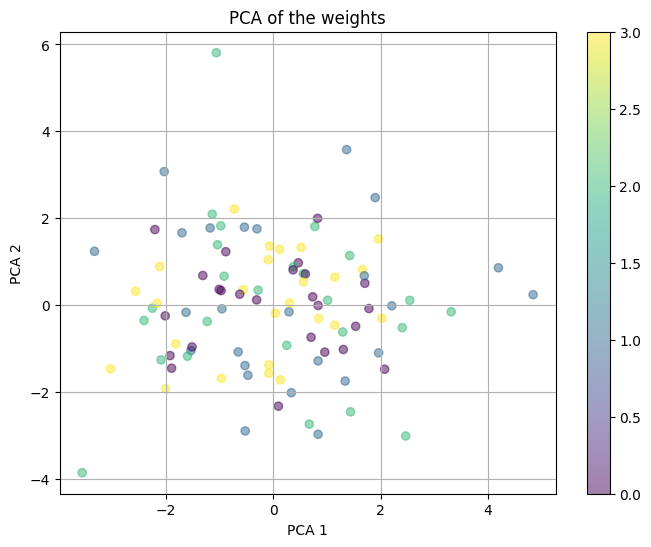

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(p1_2[:, 0], p1_2[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('PCA of the weights')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()